In [1]:
# Exploratory Data Analysis (EDA) for 2018–2019 Premier League Matches
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('/content/sample_data/england-premier-league-matches-2018-to-2019-stats.csv')

In [3]:
# Basic Info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False).head(10))
print("\nSample rows:\n", df.head())

Shape: (380, 66)

Columns:
 ['timestamp', 'date_GMT', 'status', 'attendance', 'home_team_name', 'away_team_name', 'referee', 'Game Week', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count', 'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time', 'home_team_goal_count_half_time', 'away_team_goal_count_half_time', 'home_team_goal_timings', 'away_team_goal_timings', 'home_team_corner_count', 'away_team_corner_count', 'home_team_yellow_cards', 'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards', 'home_team_first_half_cards', 'home_team_second_half_cards', 'away_team_first_half_cards', 'away_team_second_half_cards', 'home_team_shots', 'away_team_shots', 'home_team_shots_on_target', 'away_team_shots_on_target', 'home_team_shots_off_target', 'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls', 'home_team_possession', 'away_team_possession', 'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_

In [4]:
#Summary Statistics
print("\nSummary statistics:\n", df.describe().T[['mean', 'std', 'min', 'max']].round(2))


Summary statistics:
                                              mean         std           min  \
timestamp                            1.546145e+09  6877351.18  1.533928e+09   
attendance                           3.818685e+04    16720.33  9.980000e+03   
Game Week                            1.950000e+01       10.98  1.000000e+00   
Pre-Match PPG (Home)                 1.480000e+00        0.83  0.000000e+00   
Pre-Match PPG (Away)                 1.170000e+00        0.76  0.000000e+00   
home_ppg                             1.620000e+00        0.59  4.700000e-01   
away_ppg                             1.200000e+00        0.53  2.600000e-01   
home_team_goal_count                 1.570000e+00        1.31  0.000000e+00   
away_team_goal_count                 1.250000e+00        1.18  0.000000e+00   
total_goal_count                     2.820000e+00        1.60  0.000000e+00   
total_goals_at_half_time             1.250000e+00        1.14  0.000000e+00   
home_team_goal_count_half_time

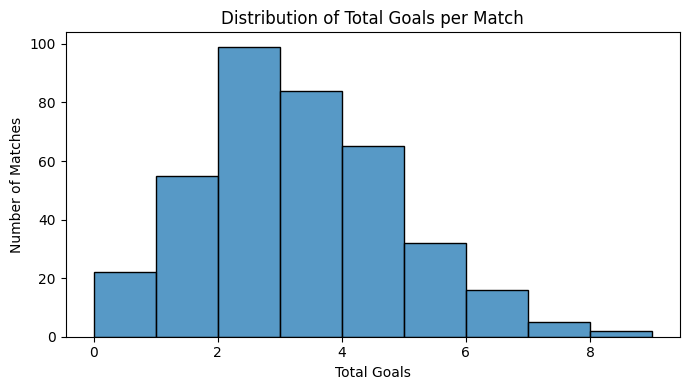

In [5]:
#Goals Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['total_goal_count'], bins=range(0, df['total_goal_count'].max()+2), kde=False)
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Total Goals')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

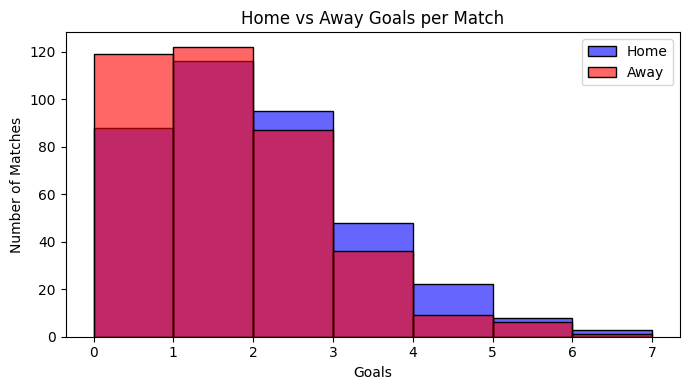

In [6]:
#Home vs Away Goals
plt.figure(figsize=(7,4))
sns.histplot(df['home_team_goal_count'], color='blue', label='Home', bins=range(0, df['home_team_goal_count'].max()+2), alpha=0.6)
sns.histplot(df['away_team_goal_count'], color='red', label='Away', bins=range(0, df['away_team_goal_count'].max()+2), alpha=0.6)
plt.title('Home vs Away Goals per Match')
plt.xlabel('Goals')
plt.ylabel('Number of Matches')
plt.legend()
plt.tight_layout()
plt.show()

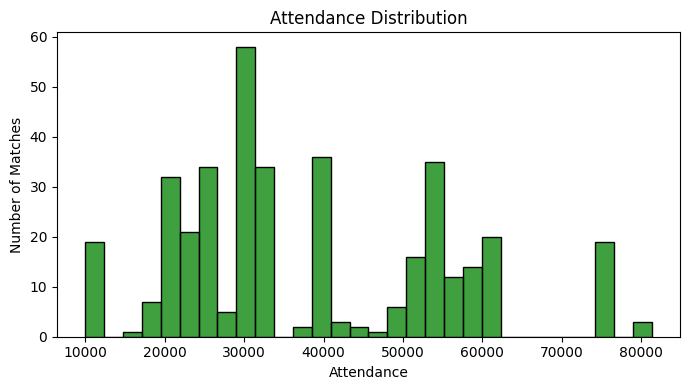

In [7]:
#Attendance Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['attendance'].dropna(), bins=30, color='green')
plt.title('Attendance Distribution')
plt.xlabel('Attendance')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

In [8]:
#Top 10 Highest Attendance Matches
print("\nTop 10 matches by attendance:")
print(df[['date_GMT', 'home_team_name', 'away_team_name', 'attendance', 'stadium_name']].sort_values('attendance', ascending=False).head(10))


Top 10 matches by attendance:
                  date_GMT     home_team_name          away_team_name  \
279  Mar 02 2019 - 12:30pm  Tottenham Hotspur                 Arsenal   
40   Sep 15 2018 - 11:30am  Tottenham Hotspur               Liverpool   
218   Jan 13 2019 - 4:30pm  Tottenham Hotspur       Manchester United   
199   Dec 30 2018 - 4:30pm  Manchester United         AFC Bournemouth   
309   Mar 30 2019 - 3:00pm  Manchester United                 Watford   
223   Jan 19 2019 - 3:00pm  Manchester United  Brighton & Hove Albion   
234   Jan 29 2019 - 8:00pm  Manchester United                 Burnley   
359   Apr 28 2019 - 3:30pm  Manchester United                 Chelsea   
98    Oct 28 2018 - 4:00pm  Manchester United                 Everton   
185   Dec 26 2018 - 3:00pm  Manchester United       Huddersfield Town   

     attendance               stadium_name  
279       81332   Wembley Stadium (London)  
40        80188   Wembley Stadium (London)  
218       80062   Wembley Stad

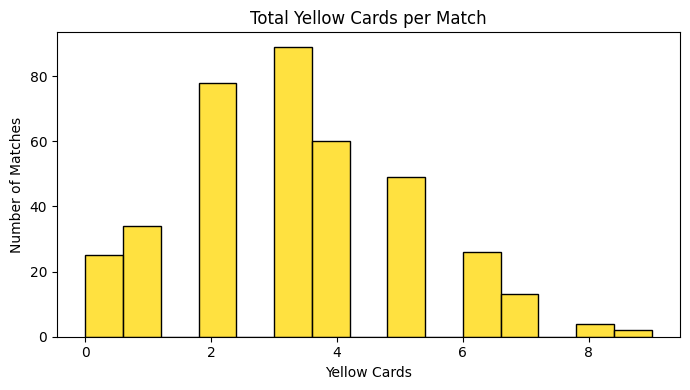

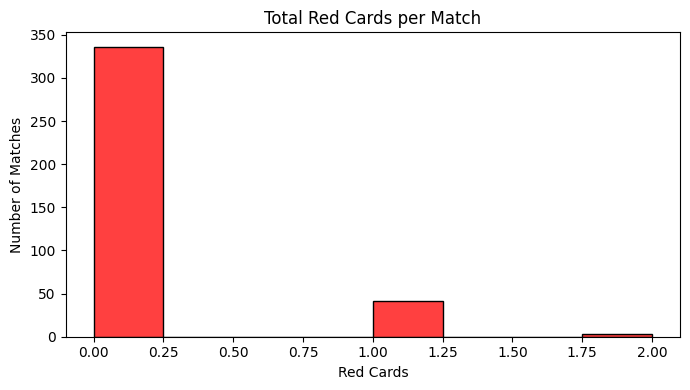

In [9]:
#Yellow and Red Cards
plt.figure(figsize=(7,4))
sns.histplot(df['home_team_yellow_cards'] + df['away_team_yellow_cards'], bins=15, color='gold')
plt.title('Total Yellow Cards per Match')
plt.xlabel('Yellow Cards')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(df['home_team_red_cards'] + df['away_team_red_cards'], bins=8, color='red')
plt.title('Total Red Cards per Match')
plt.xlabel('Red Cards')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

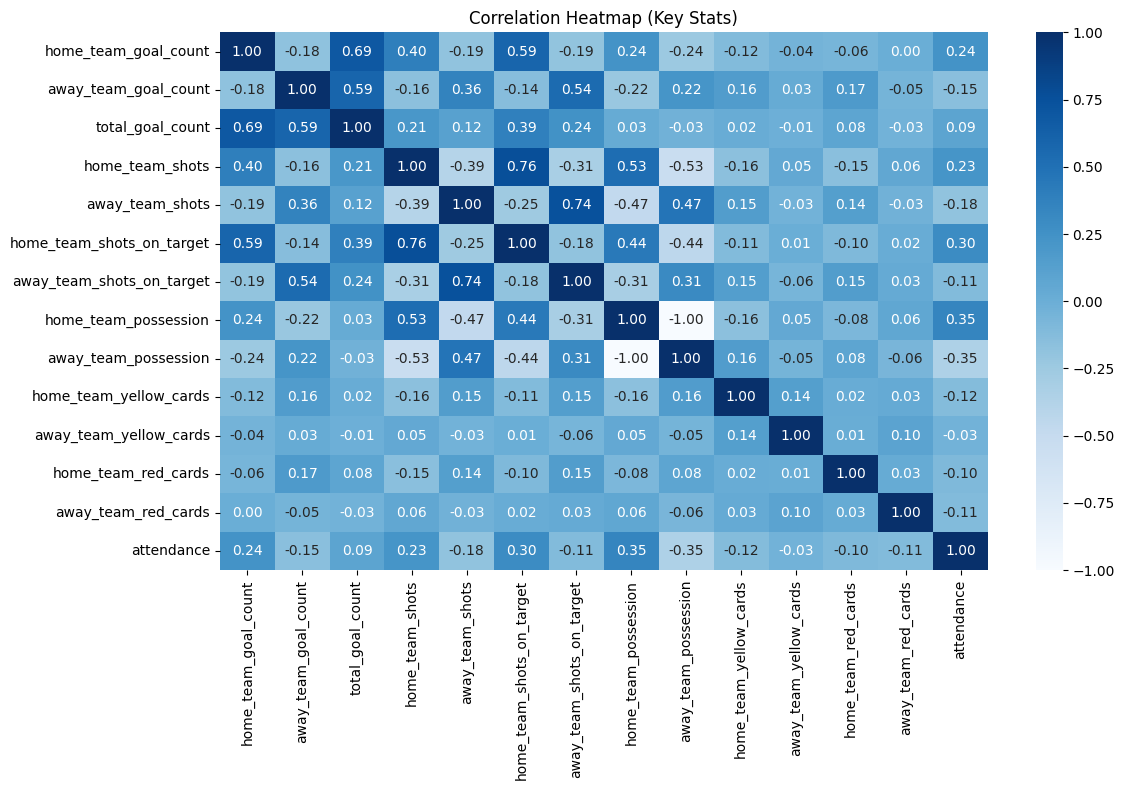

In [10]:
#Correlation Heatmap for Key Stats
key_stats = [
    'home_team_goal_count', 'away_team_goal_count', 'total_goal_count',
    'home_team_shots', 'away_team_shots',
    'home_team_shots_on_target', 'away_team_shots_on_target',
    'home_team_possession', 'away_team_possession',
    'home_team_yellow_cards', 'away_team_yellow_cards',
    'home_team_red_cards', 'away_team_red_cards',
    'attendance'
]
plt.figure(figsize=(12,8))
sns.heatmap(df[key_stats].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Heatmap (Key Stats)')
plt.tight_layout()
plt.show()


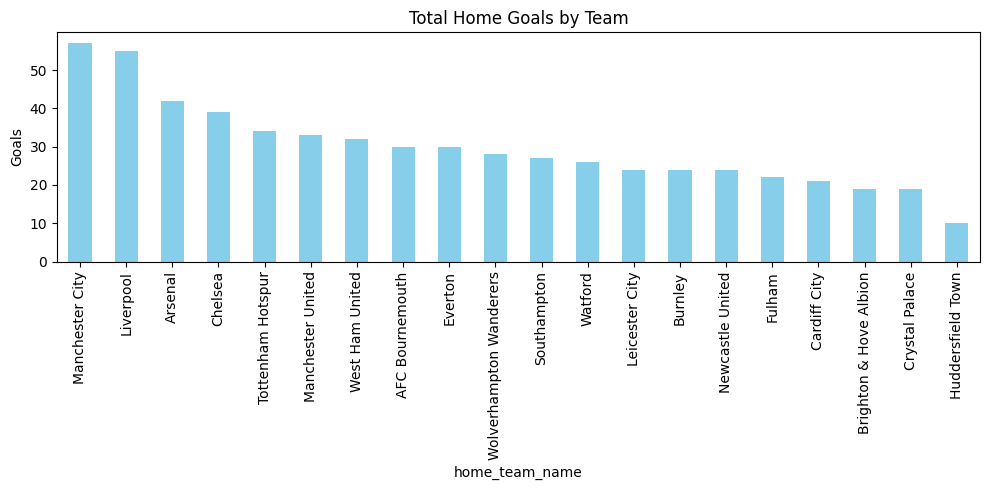

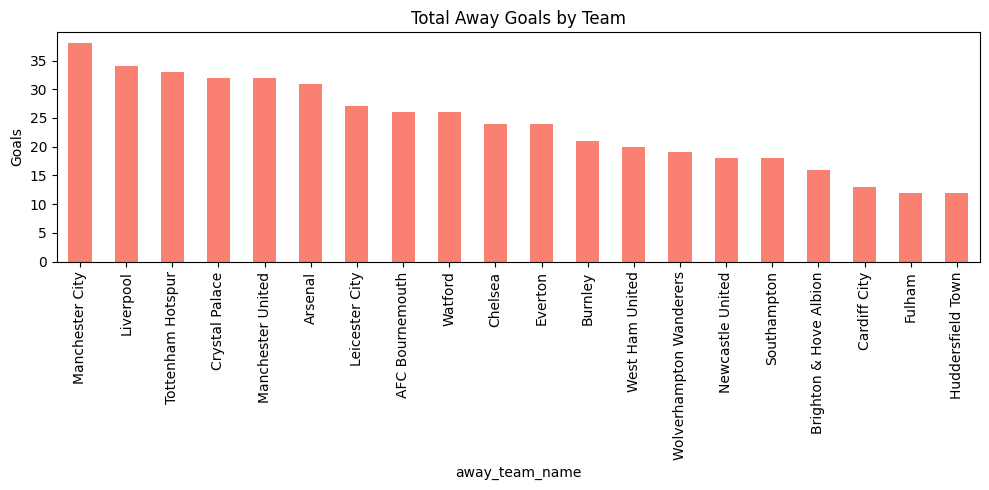

In [11]:
#Goals by Team (Home and Away)
home_goals = df.groupby('home_team_name')['home_team_goal_count'].sum().sort_values(ascending=False)
away_goals = df.groupby('away_team_name')['away_team_goal_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
home_goals.plot(kind='bar', color='skyblue', label='Home Goals')
plt.title('Total Home Goals by Team')
plt.ylabel('Goals')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
away_goals.plot(kind='bar', color='salmon', label='Away Goals')
plt.title('Total Away Goals by Team')
plt.ylabel('Goals')
plt.tight_layout()
plt.show()

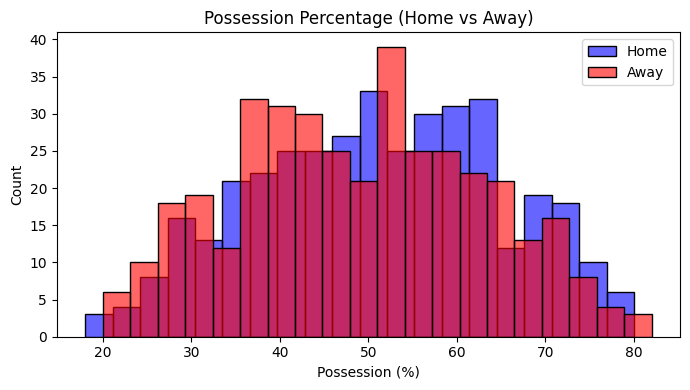

In [12]:
#Possession Analysis
plt.figure(figsize=(7,4))
sns.histplot(df['home_team_possession'], bins=20, color='blue', label='Home', alpha=0.6)
sns.histplot(df['away_team_possession'], bins=20, color='red', label='Away', alpha=0.6)
plt.title('Possession Percentage (Home vs Away)')
plt.xlabel('Possession (%)')
plt.legend()
plt.tight_layout()
plt.show()

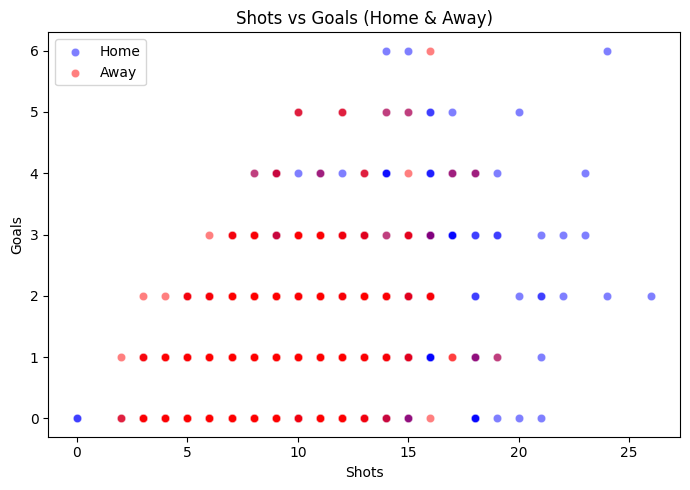

In [13]:
#Shots vs Goals (Scatter)
plt.figure(figsize=(7,5))
sns.scatterplot(x='home_team_shots', y='home_team_goal_count', data=df, label='Home', color='blue', alpha=0.5)
sns.scatterplot(x='away_team_shots', y='away_team_goal_count', data=df, label='Away', color='red', alpha=0.5)
plt.title('Shots vs Goals (Home & Away)')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.legend()
plt.tight_layout()
plt.show()